In [ ]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import DataLoader, random_split
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
labels_training = pd.read_csv("Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
labels_testing = pd.read_csv("Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")
labels_training.dropna(axis = 1, inplace = True)
labels_training, labels_testing

(    Image name  Retinopathy grade  Risk of macular edema 
 0    IDRiD_001                  3                       2
 1    IDRiD_002                  3                       2
 2    IDRiD_003                  2                       2
 3    IDRiD_004                  3                       2
 4    IDRiD_005                  4                       0
 ..         ...                ...                     ...
 408  IDRiD_409                  2                       1
 409  IDRiD_410                  2                       0
 410  IDRiD_411                  2                       0
 411  IDRiD_412                  2                       0
 412  IDRiD_413                  2                       0
 
 [413 rows x 3 columns],
     Image name  Retinopathy grade  Risk of macular edema 
 0    IDRiD_001                  4                       0
 1    IDRiD_002                  4                       1
 2    IDRiD_003                  4                       0
 3    IDRiD_004              

In [ ]:
training_path = "Disease Grading/1. Original Images/a. Training Set"
testing_path = "Disease Grading/1. Original Images/b. Testing Set"

# Transformers
transform = transforms.Compose([
        transforms.RandomHorizontalFlip(0.5),
        transforms.Resize([224, 300]),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomRotation(45),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(training_path, transform = transform)
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])
test_dataset = torchvision.datasets.ImageFolder(testing_path, transform = transform)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size = 64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size = 64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size = 64, shuffle=False)

In [ ]:
train_dataset[0][0]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [ ]:
from PIL import Image

sample_image = Image.open("Disease Grading/1. Original Images/a. Training Set/Class0/IDRiD_118.jpg")

transformed_image = transform(sample_image)

transformed_image.size()

torch.Size([3, 224, 300])

### Logistic Regression

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic regression model
def extract_features(loader):
    features = []
    labels = []
    for images, batch_labels in loader:
        flattened_images = images.view(images.size(0), -1)
        features.append(flattened_images)
        labels.append(batch_labels)
    features = torch.cat(features, dim=0)
    labels = torch.cat(labels, dim=0)
    return features.numpy(), labels.numpy()

train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(train_features, train_labels)

In [ ]:
# Test Predictions
test_predictions = log_reg_model.predict(test_features)

# Evaluation
accuracy = accuracy_score(test_labels, test_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.36893203883495146


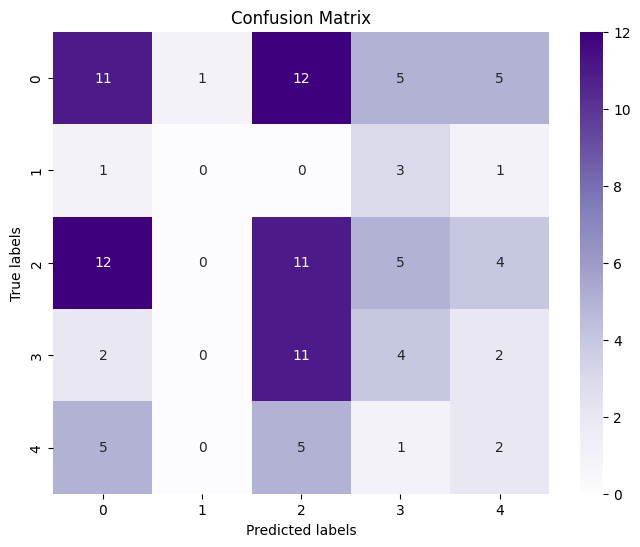

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=np.arange(5), yticklabels=np.arange(5))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()